In [1]:
##Let's regress SalePrice onto LotArea to start with

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor


dftrain = pd.read_csv("train.csv", engine='python')
print(dftrain.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [3]:
dftrain.shape

(1460, 81)

In [4]:
dftrain.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
158    159          60       FV        100.0    12552   Pave   NaN      Reg   
690    691         120       RM          NaN     4426   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
1265  1266         160       FV         35.0     3735   Pave   NaN      Reg   
551    552          20       RM         50.0     6000   Pave   NaN      Reg   
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1158  1159          20       RL         92.0    11932   Pave   NaN      Reg   
546    547          50       RL         70.0     8737   Pave   NaN      IR1   
1216  1217          90       RM         68.0     8930   Pave   NaN      Reg   
1262  1263          50       RL          NaN    11250   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
158          Lvl    AllPub    ...            0    NaN  GdWo         NaN   
690          Lvl    AllPub    ...            0    NaN   NaN         NaN   
38           Lvl    AllPub    ...            0    NaN   NaN         NaN   
1265         Lvl    AllPub    ...            0    NaN   NaN         NaN   
551          Lvl    AllPub    ...            0    NaN   NaN         NaN   
0            Lvl    AllPub    ...            0    NaN   NaN         NaN   
1158         Lvl    AllPub    ...            0    NaN   NaN         NaN   
546          Bnk    AllPub    ...            0    NaN   NaN         NaN   
1216         Lvl    AllPub    ...            0    NaN   NaN         NaN   
1262         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
158        0      5   2010        WD         Normal     254900  
690        0      5   2008        WD         Normal     141000  
38         0      1   2010        WD        Abnorml     109000  
1265       0      3   2006        WD         Normal     183900  
551        0      6   2008        WD         Normal     112500  
0          0      2   2008        WD         Normal     208500  
1158       0      6   2008     ConLD        Partial     235128  
546        0      5   2007        WD         Normal     210000  
1216       0      4   2010        WD         Normal     112000  
1262       0     11   2009        WD         Normal     161500  

[10 rows x 81 columns]

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
list(dftrain['SalePrice'])

[208500,
 181500,
 223500,
 140000,
 250000,
 143000,
 307000,
 200000,
 129900,
 118000,
 129500,
 345000,
 144000,
 279500,
 157000,
 132000,
 149000,
 90000,
 159000,
 139000,
 325300,
 139400,
 230000,
 129900,
 154000,
 256300,
 134800,
 306000,
 207500,
 68500,
 40000,
 149350,
 179900,
 165500,
 277500,
 309000,
 145000,
 153000,
 109000,
 82000,
 160000,
 170000,
 144000,
 130250,
 141000,
 319900,
 239686,
 249700,
 113000,
 127000,
 177000,
 114500,
 110000,
 385000,
 130000,
 180500,
 172500,
 196500,
 438780,
 124900,
 158000,
 101000,
 202500,
 140000,
 219500,
 317000,
 180000,
 226000,
 80000,
 225000,
 244000,
 129500,
 185000,
 144900,
 107400,
 91000,
 135750,
 127000,
 136500,
 110000,
 193500,
 153500,
 245000,
 126500,
 168500,
 260000,
 174000,
 164500,
 85000,
 123600,
 109900,
 98600,
 163500,
 133900,
 204750,
 185000,
 214000,
 94750,
 83000,
 128950,
 205000,
 178000,
 118964,
 198900,
 169500,
 250000,
 100000,
 115000,
 115000,
 190000,
 136900,
 180000,
 3

In [7]:
report = pandas_profiling.ProfileReport(dftrain)
report

In [8]:
df_num = dftrain.select_dtypes(include = ['float64', 'int64'])

In [9]:
df_num

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20          NaN    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20          NaN    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20          NaN    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20          NaN     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
...    ...         ...          ...      ...          ...          ...   
1430  1431          60         60.0    21930            5            5   
1431  1432         120          NaN     4928            6            6   
1432  1433          30         60.0    10800            4            6   
1433  1434          60         93.0    10261            6            5   
1434  1435          20         80.0    17400            5            5   
1435  1436          20         80.0     8400            6            9   
1436  1437          20         60.0     9000            4            6   
1437  1438          20         96.0    12444            8            5   
1438  1439          20         90.0     7407            6            7   
1439  1440          60         80.0    11584            7            6   
1440  1441          70         79.0    11526            6            7   
1441  1442         120          NaN     4426            6            5   
1442  1443          60         85.0    11003           10            5   
1443  1444          30          NaN     8854            6            6   
1444  1445          20         63.0     8500            7            5   
1445  1446          85         70.0     8400            6            5   
1446  1447          20          NaN    26142            5            7   
1447  1448          60         80.0    10000            8            5   
1448  1449          50         70.0    11767            4            7   
1449  1450         180         21.0     1533            5            7   
1450  1451          90         60.0     9000            5            5   
1451  1452          20         78.0     9262            8            5   
1452  1453  

In [14]:
print('hello')

hello


In [11]:
dftrain['AreaBin'] = pd.cut(dftrain.LotArea, 20, labels=False)
# Using another column other than age is also OK because we just need the count
X = dftrain.groupby('AreaBin')[['LotArea', 'LotFrontage']].agg({'LotArea':'mean', 'LotFrontage':'count'})
X.columns = ['LotArea', 'count']

In [12]:
lm = LinearRegression()
# scikit-learn expects input X to be a two-dimensional structure
lm.fit(X[['LotArea']], X['count'])
print('intercept %.2f' %(lm.intercept_))
print('slope %.2f' %(lm.coef_))

intercept 263.23
slope -0.00


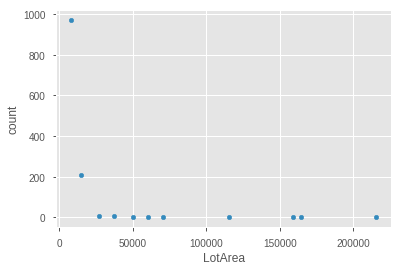

In [13]:
Y = X[X['count']<400]
X.plot.scatter(x = 'LotArea', y = 'count')